# Python Codes

Later in this course, we will need to use a statistical software such as `Python` or `R`, as we won't be able to make a lot of computations by hand or we won't be able to recognize or write the probability distribution we're interested in analytically. 

You won't need to code a lot, but it won't hurt if you start getting used to `Python` or `R` a bit.  
If I do a visualization or do a computation using Python, I'll put the code here.

## Drawing the histogram of a binomial distribution:

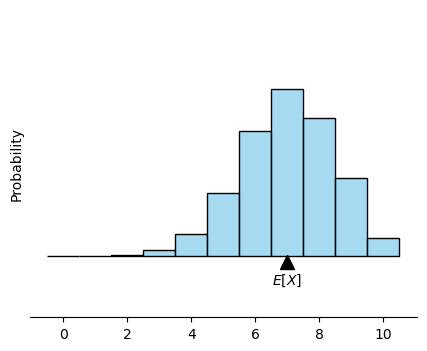

In [10]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = np.random.binomial(n, p, 10000)

# plot histogram using seaborn
plt.figure(figsize=(5, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, n+1.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = n * p

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[X]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)


plt.show()

## How to visualize the expectation of a function

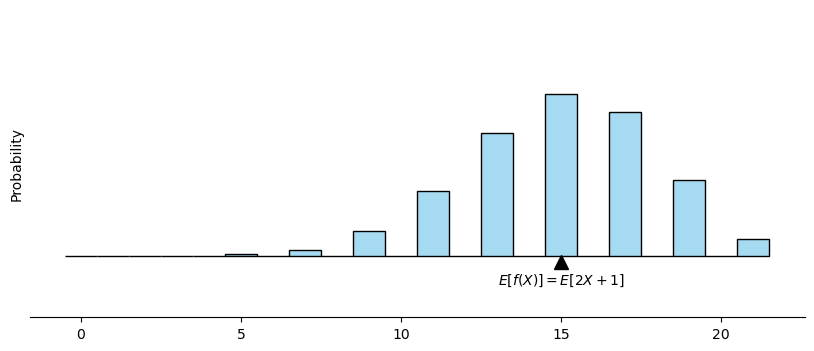

In [9]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = 2*np.random.binomial(n, p, 10000)+1

# plot histogram using seaborn
plt.figure(figsize=(10, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, 2*n+2.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = 2*n * p+1

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[f(X)] = E[2X+1]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)

plt.show()